# Customer Churn Prediction in Banking sector

In [ ]:



# Customer Churn Prediction in banking Sector
#Rushabh Jhawar, Ankita Thakur, Jaswanth Chidella, Pranay Nara
#Group number 8 & Class Section 03
#4550 Analytics Programming

#Professor name : Theyab Alhwiti



# Python libraries and packages. 

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import seaborn as sns
import sklearn
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, auc, roc_curve
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report

# Data Description

In [124]:
# Loading the dataset

customer_data = pd.read_csv(r'C:/Users/Rusha/OneDrive/Desktop/Python final project/Churn_Modelling.csv')
print(customer_data)

# We display the no of columns present in the existing dataset
columns = customer_data.columns.values.tolist()
print(columns)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

# Data Cleaning and Preparation

In [125]:


# We remove the RowNumber, CustomerId, and Surname columns from our feature set
# as they do not contribute to the churn in any way

dataset = customer_data.drop(['RowNumber','CustomerId','Surname'], axis=1)











In [126]:
#Dropping rows containing NA values
customer_data = customer_data.dropna()

In [127]:
# To apply machine learning algorithms we first convert categorical data to numerical data

# So isolating the two columns geography and gender

dataset =  dataset.drop(['Geography', 'Gender'], axis=1)
print(dataset)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1        101348.88       1  
1                  1        112542.58       0  
2  

In [128]:
# For the mentioned country (geography) value is set to 1 and rest value is 0

Geography = pd.get_dummies(customer_data.Geography).iloc[:,1:]

In [129]:
# Converting gender to Boolean

Gender = pd.get_dummies(customer_data.Gender).iloc[:,1:]
print(Gender, Geography) 

      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]       Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]


In [130]:
# After editing the columns we need to concatenate to the original dataset
dataset = pd.concat([dataset,Geography,Gender], axis=1)

In [131]:
# After preprocessing the data we need to isolate our target variable

X =  dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

# Normalize

In [132]:
# normalize int 
def normalize(values):
    return (values - values.min())/(values.max() - values.min())

# Normalize the feature columns
customer_data[['Age','Tenure']] =customer_data[['Age','Tenure']].apply(normalize)

# Modeling 

In [105]:
# So X has our target variable and y has the remaining dataset 
# we split our training as well as test data with the ratio of 8:2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# We use the random forest algorithm for classification and first train the dataset

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)









<AxesSubplot:xlabel='Age', ylabel='Balance'>

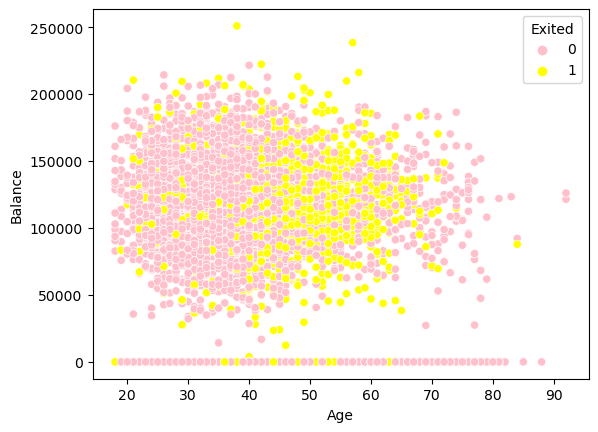

In [133]:
import seaborn as sns
sns.scatterplot(x='Age',
                y='Balance',
                hue='Exited',data=dataset)

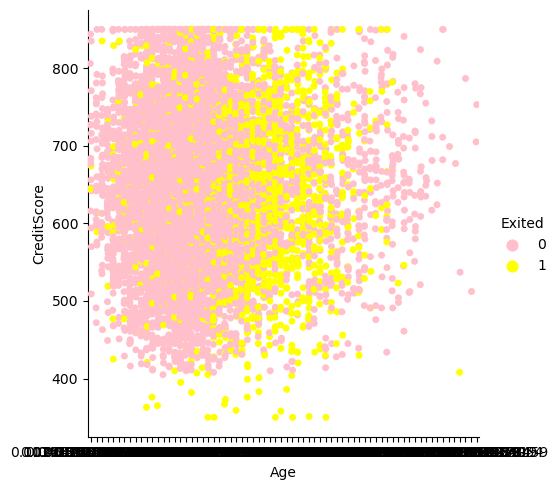

In [121]:
custom_palette = ['pink', 'yellow']
sns.set_palette(custom_palette)
sns.catplot(x="Age", y="CreditScore", hue="Exited",  data=customer_data)

Accuracy: 78.90%
Precision: 37.31% 
Recall: 6.17% 
AUC: 67.35% 


<AxesSubplot:xlabel='Exited', ylabel='Age'>

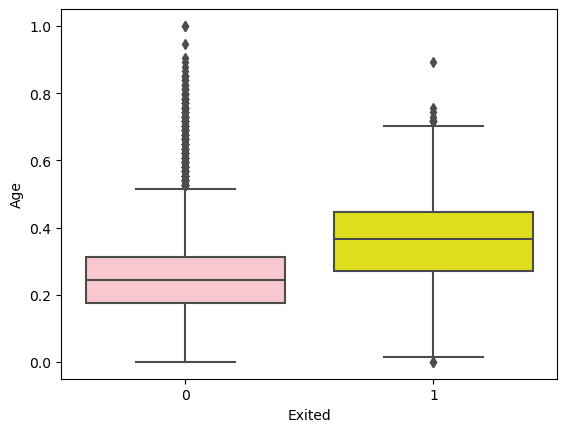

In [134]:
import seaborn as sns
sns.boxplot(x='Exited',
                y='Age', data=customer_data)

# Performance Evaluation

In [85]:
# On training we test the dataset and get the output

# We use the random forest algorithm for classification and first train the dataset

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)


from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))
print("The accuracy score is 86.35")

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635
The accuracy score is 86.35


In [123]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(X_train, y_train)
LRpred = LR.predict(X_test)
# Print out
LRpredproba = LR.predict_proba(X_test)
roc=roc_auc_score(y_test,LRpredproba[:, 1])

accuracy=accuracy_score(y_test,LRpred)
precision=precision_score(y_test, LRpred)
recall=recall_score(y_test, LRpred)
#roc=roc_auc_score(y_test,LRpred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))
print("AUC: %.2f%% " % (roc *100))


Accuracy: 78.90%
Precision: 37.31% 
Recall: 6.17% 
AUC: 67.35% 


<AxesSubplot:xlabel='Age', ylabel='Count'>

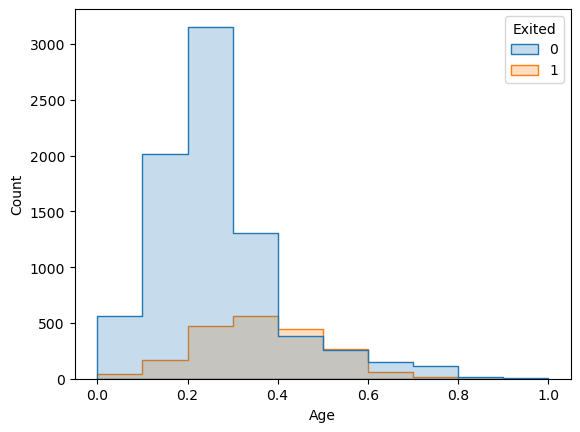

In [108]:
sns.histplot(customer_data, x="Age", hue="Exited", element="step", bins = 10)

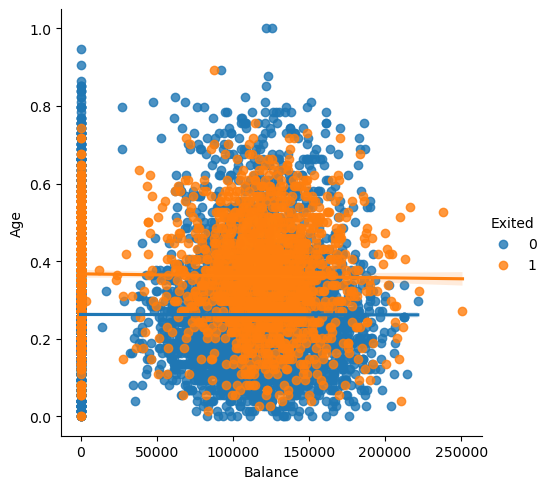

In [114]:
sns.lmplot(
    data=customer_data,
    x="Balance", y="Age", hue="Exited",

    height=5
)




# Steps for improving the performance

In [64]:
# Ideally, we can use autotune moduling for logistic regression as well as random forest regression.

# We can modify the models to improve prediction accuracy.

# For example, we can consider the interactions between the variables with an in depth analysis of the dataset.

# We can collabarate with the bank CRM team and find additional factors to improve the model.

# We can also explore different prediction error rates of Random Forests with the optimal values of the parameters.



# Analysis of figures and results

<AxesSubplot:>

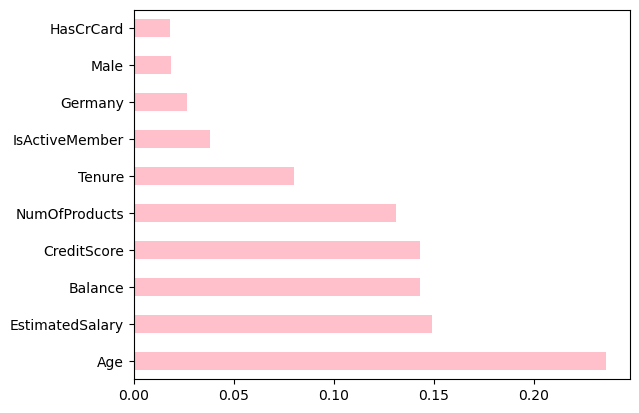

In [110]:
# On evaluation of various features we get the below bar chart
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',color='pink')

# Business suggestion (based on your analysis what is your business recommendation?)

In [ ]:
#Based on our analysis, we can conclude that regression model gives us a good accuracy rate
#but also there’s a lot to be desired in terms of its implementation in the real world. 
#The banking ecosystem need to understand the issues at hand and make efforts to avoid customer churn.

In [ ]:
# The CRM can collabarate with analysts and find additional factors to improve the model.

In [ ]:
# Also, identifying customers who are on the verge of leaving can be found on the basis of 
# CreditScore, Age, Tenure, Balance, NumOfProducts etc.